<a href="https://colab.research.google.com/github/34-anish/FOML/blob/main/Question_No_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
!pip install sklearn seaborn plotly scipy statsmodels numpy pandas

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=c0fbee8f4bb71b23480807a5c631cdc31d362337beca602245efb171c8a30749
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gamma
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
import numpy as np
from scipy.optimize import minimize
from sklearn import linear_model
import plotly.express as px
import scipy.stats as ss

In [ ]:
file_path = 'time-meal.csv'
df = pd.read_csv(file_path)

The data is broken down into different categories

The df holds the data of the duration it took for each of the meal type on each date , day , whether there was a holiday or not , category and the starting time

# Categorization of data according to the meal type

In [ ]:
breakfast_data = df[df['Category'] == 'Breakfast']
lunch_data = df[df['Category'] == 'Lunch']
snacks_data = df[df['Category'] == 'Snacks']
dinner_data = df[df['Category'] == 'Dinner']

meal_categories = ['Breakfast', 'Lunch', 'Snacks', 'Dinner']

lunch_data holds the data of the duration it took for eating the lunch

# EDA


## Scatter Plot

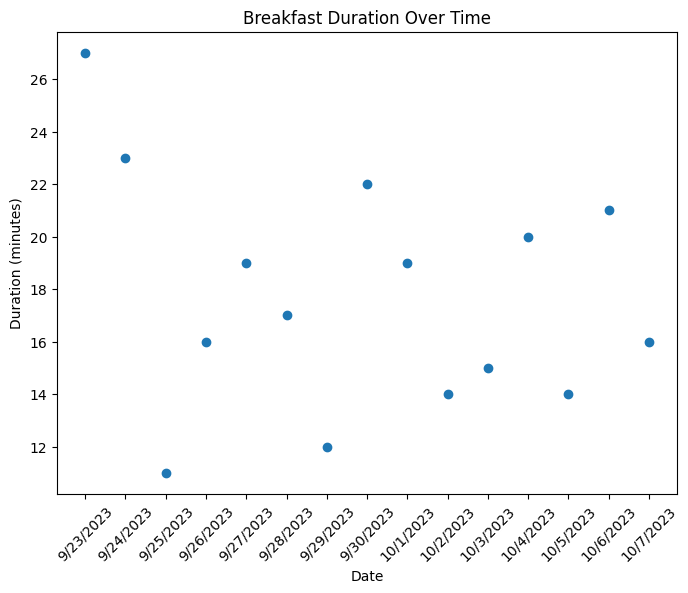

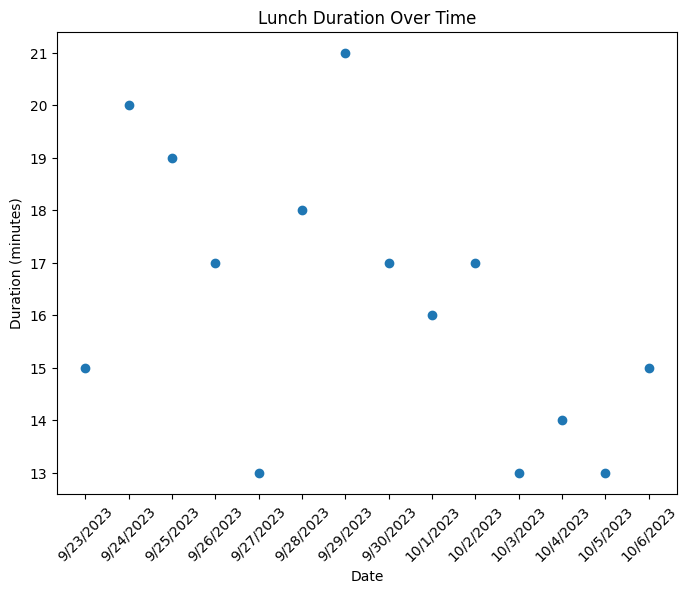

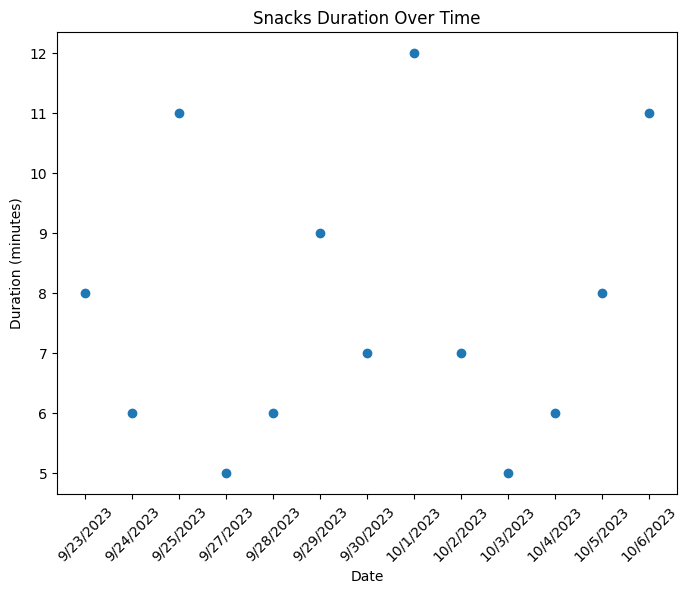

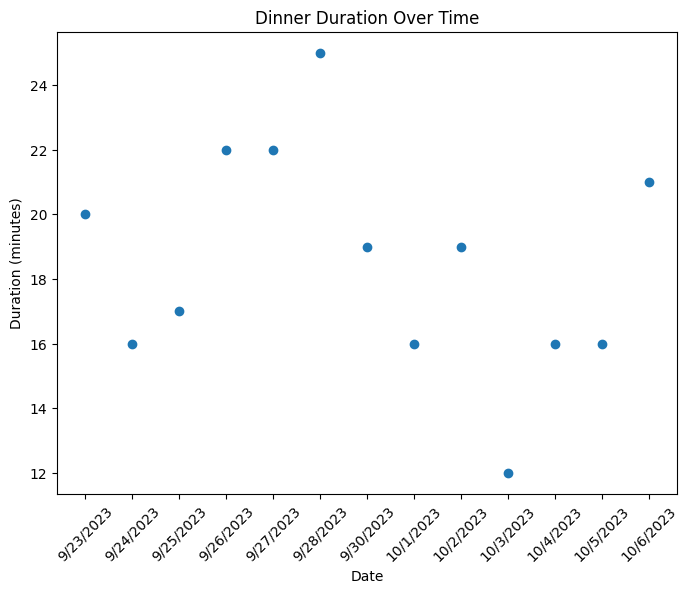

In [ ]:

for category_data, meal_category in zip([breakfast_data, lunch_data, snacks_data, dinner_data], meal_categories):
    plt.figure(figsize=(8, 6))
    plt.scatter(category_data['Date'], category_data['Duration'], marker='o', label=meal_category)
    plt.title(f'{meal_category} Duration Over Time')
    plt.xlabel('Date')
    plt.ylabel('Duration (minutes)')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

The scatterplot shows the total duration it took for the each type of meal according to the categories

## Historigram

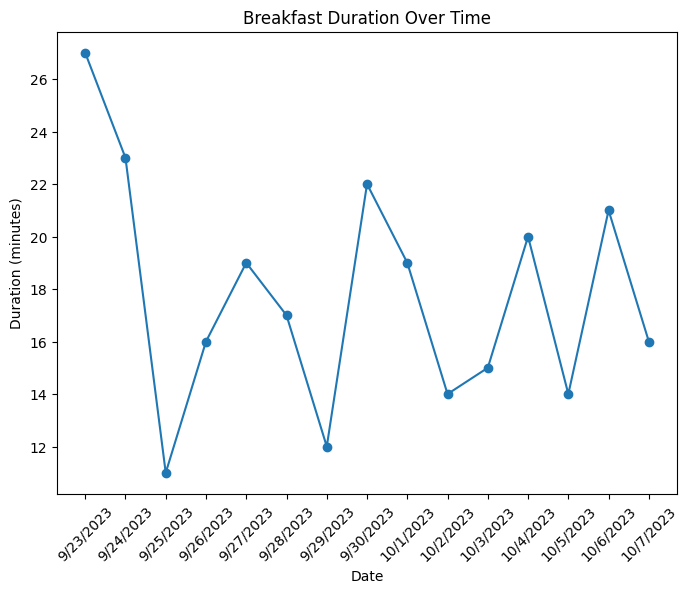

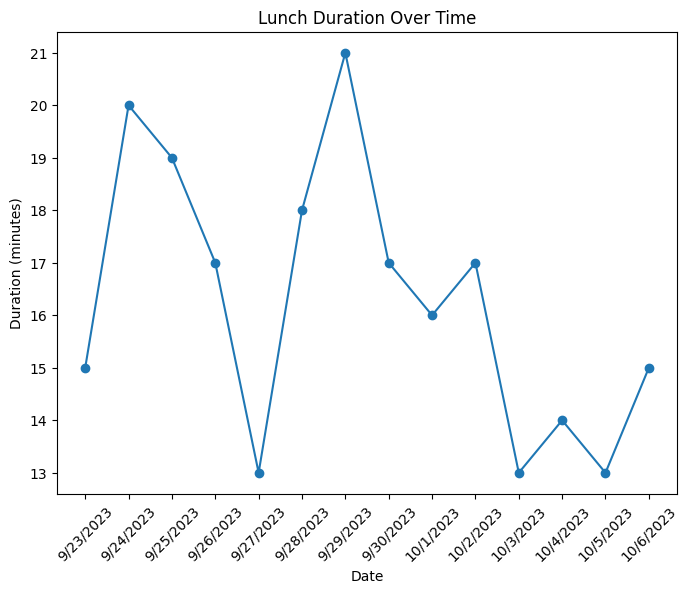

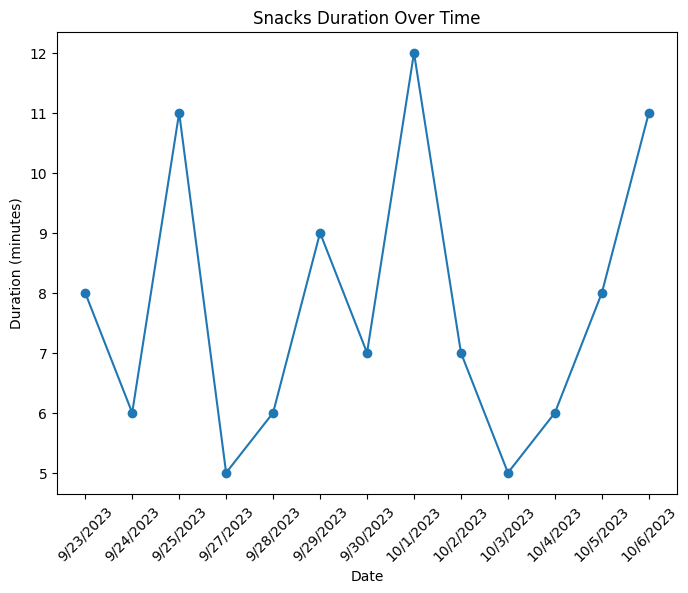

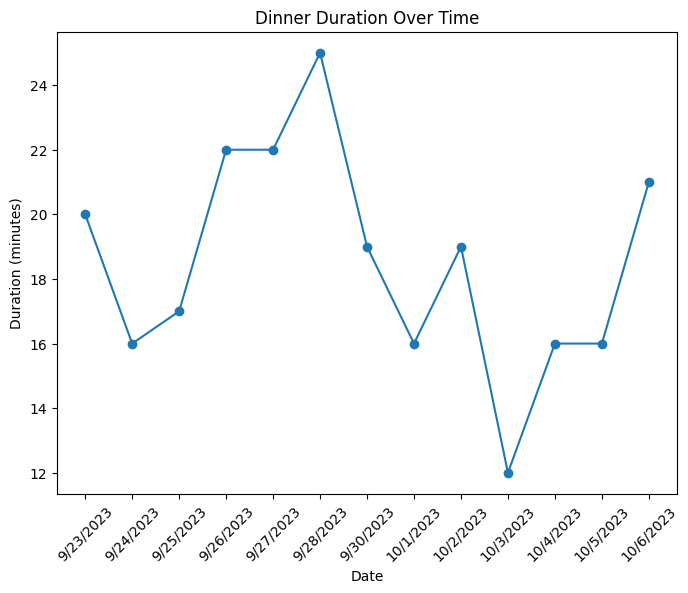

In [ ]:

for category_data, meal_category in zip([breakfast_data, lunch_data, snacks_data, dinner_data], meal_categories):
    plt.figure(figsize=(8, 6))
    plt.plot(category_data['Date'], category_data['Duration'], marker='o', label=meal_category)
    plt.title(f'{meal_category} Duration Over Time')
    plt.xlabel('Date')
    plt.ylabel('Duration (minutes)')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

The historigraph is a time series plot which shows how the time varies upon each date. The graph is showing how the distribution of the datasts is.

In [ ]:
## Violin Plot

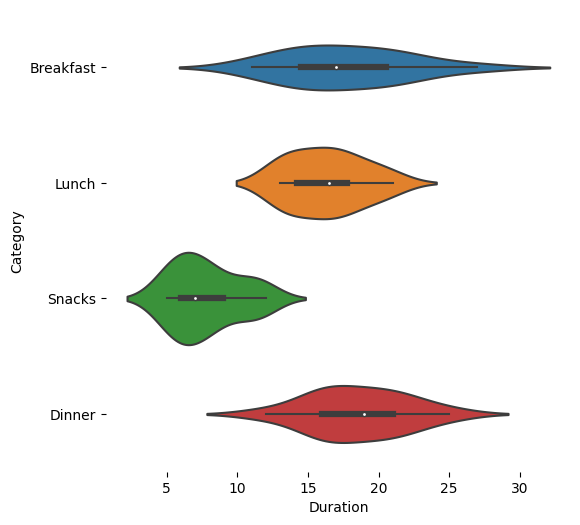

In [ ]:

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
    figsize = [6, 6]
    plt.figure(figsize=figsize)

    # Convert 'Day' column to categorical
    df[facet_colname] = pd.Categorical(df[facet_colname], categories=df[facet_colname].unique(), ordered=True)

    ax = sns.violinplot(data=df, x=value_colname, y=facet_colname)



    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.show()

# Example usage:
violin_plot(df, 'Duration', 'Category', inner='stick')


In [ ]:
breakfast_data.describe()

,Duration
count,15.000000
mean,17.733333
std,4.399134
min,11.000000
25%,14.500000
50%,17.000000
75%,20.500000
max,27.000000


Violin plots are used when we want to compare the distribution of the data and to know if the data lies in the interquartile range and to know how the data is deviating from the interquartile range.
Upon observing the violinplot following can be interfred:
1. It takes a longer time to eat breakfast and snacks takes a less amount of time
2. It takes similar amount of time to eat lunch
3. Dinner is done faster than the lunch and this is generally true because lunch is after 1:00 (after attending the class with other classes pending upon)

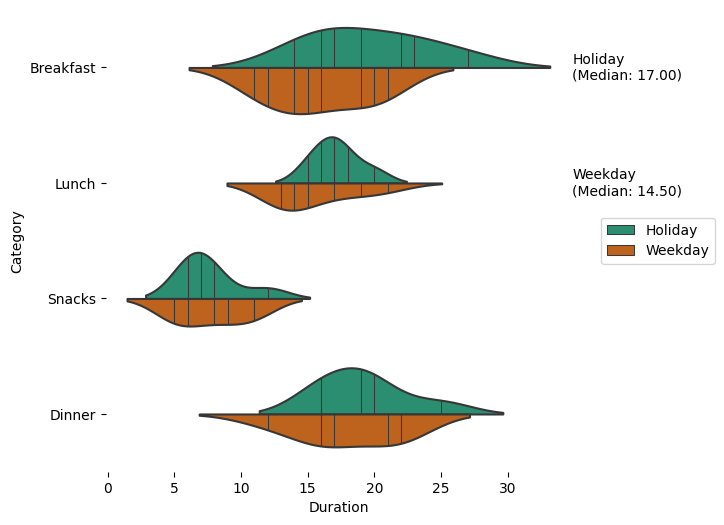

In [ ]:



def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
    figsize = [6, 6]
    plt.figure(figsize=figsize)

    # Convert 'Day' column to categorical
    df[facet_colname] = pd.Categorical(df[facet_colname], categories=df[facet_colname].unique(), ordered=True)

    ax = sns.violinplot(data=df, x=value_colname, y=facet_colname, hue='Day Type', palette=mpl_palette_name, split=True, legend=False, **kwargs)

    # Add labels on the right side for 'Day Type'
    unique_day_types = df['Day Type'].unique()
    for i, day_type in enumerate(unique_day_types):
        # Calculate the median value for the current 'Day Type'
        median_val = df[df['Day Type'] == day_type][value_colname].median()

        # Add labels for 'Day Type' on the right side, shifted to the right
        ax.text(ax.get_xlim()[1] + 0.1, i, f'{day_type}\n(Median: {median_val:.2f})', verticalalignment='center')
        ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.show()

# Example usage:
violin_plot(df, 'Duration', 'Category', inner='stick')


The violinplot shows how the data get affected when there it is holiday and the weekday. The violinplot clearly shows how the endingtime is affected by the holiday.
Generally when it is the holiday we tend to be more relaxed and eat in a relaxed manner. The median is also telling the story on how the timing gets affected.

## Interactive graph

In [ ]:
# Convert 'Time of Day' to datetime
# df['Time of Day'] = pd.to_datetime(df['Time of Day'])

# Define a color map for Day Type
color_map = {'Holiday': 'red', 'Weekday': 'blue'}

# Create an interactive scatter plot with specified colors
fig = px.scatter(df, x='Day', y='Duration', color='Day Type',
                 size='Duration', hover_data=['Category', 'Time of Day'],
                 title='Interactive Duration vs Day Scatter Plot',
                 labels={'Duration': 'Duration (minutes)', 'Day': 'Day of the Week'},
                 color_discrete_map=color_map)

# Show the plot
fig.show()




The interactive graph is used to show the whole data in a place. The graph shows the total time taken to eat at different day.
Following can be infered from the graph:
- ![image.png](attachment:image.png).
- It took the longest time to eat breakfast on Saturday. (I think that's beacause of the Dosa 😂😂)
- Snacks took a shorter amount of time especially on Tuesday and Wednesday.

# Data Pre-Processing

In [ ]:
#Changing the date to to the numerical value (Encoding)
def change_date_to_sn(data):

  df = pd.DataFrame(data)

  # Convert 'Date' to datetime
  df['Date'] = pd.to_datetime(df['Date'])

  # Get the numeric representation of the date
  df['Numeric_Date'] = (df['Date'] - df['Date'].min()).dt.days
  # Reset the index and remove the old index
  df = df.reset_index(drop=True)
  return df['Numeric_Date'].to_numpy()


Dropping other features and Preprocessing them

In [ ]:
df['Time of Day'] = df['Time of Day'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df.drop(['Day Type'],axis=1,inplace = True)
df['Day'] = df['Day'].map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6})

df['Date']= change_date_to_sn(df['Date'])

df['Category'] = pd.Categorical(df['Category']).codes
df

,Date,Day,Category,Time of Day,Duration
0,0,6,0,605,27
1,0,6,1,795,15
2,0,6,2,1030,8
3,0,6,3,1230,20
4,1,0,0,610,23
5,1,0,1,780,20
6,1,0,2,1060,6
7,1,0,3,1190,16
8,2,1,0,515,11
9,2,1,1,845,19


Original dataset
![image.png](attachment:image.png)

The dataframe is now converted into the ordinal data

# Splitting the data

In [ ]:
#Selecting Date , Day ,Category as an input feature and Duration as the target variable and adding the bias term to the X

X= df[['Date','Day','Category','Time of Day']]
X.insert(0, 'bias', 1)
y=df['Duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train



,bias,Date,Day,Category,Time of Day
3,1,0,6,3,1230
33,1,8,0,3,1249
34,1,9,1,0,507
8,1,2,1,0,515
17,1,4,3,2,1046
6,1,1,0,2,1060
4,1,1,0,0,610
47,1,12,4,1,813
27,1,7,6,1,857
46,1,12,4,0,571


![image.png](attachment:image.png)

# Normalizing the data

$$ X_{changed} = \frac{X-X{min}}{X{max}-X{min}}$$
We can also scale the data

# Maximum Likelihood estimation for Poisson Regression

![image.png](attachment:image.png)

- The linear Regression fails in such a case as the time is not fixed and keeps on changing according to the nature of the problem. This non-linearity is often failed to be captured by the linear regression.
- The suitable way is to postulate data according to different distributions such as Poisson , Exponential , Gamma which predicts the real +ve valued
- The Decision Tree Regressor can also be used
- Time series forecasting models or machine learning models designed for time series data, such as ARIMA, SARIMA, Prophet, or Long Short-Term Memory (LSTM) networks can also be used


![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:

def negative_log_likelihood(theta, X, y):

    lambda_values = np.exp(np.dot(X, theta))
    log_likelihood = np.sum(y * np.log(lambda_values) - lambda_values)
    return -log_likelihood

# Initial guess for theta
initial_theta = np.zeros(X_train.shape[1])

# Perform optimization to find MLE
result = minimize(negative_log_likelihood, initial_theta, args=(X_train, y_train), method='BFGS')

# Extract MLE for theta
theta_mle = result.x

print("Maximum Likelihood Estimate for theta:")
print(theta_mle)


<ipython-input-14-30e6e66c3373>:3: RuntimeWarning:

overflow encountered in exp



Maximum Likelihood Estimate for theta:
[ 4.29573736e+00 -9.81684752e-03  2.38206238e-02  5.35212980e-01
 -2.63602700e-03]


![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
y_hat_poisson_derived= theta_mle @X_test.T
y_hat_poisson_derived = np.exp(y_hat_poisson_derived)
print("Predicted Duration from Poisson Regression")
print(y_hat_poisson_derived)
print("Actual Time")
print(y_test)

Predicted Duration from Poisson Regression
31    12.006310
5     15.879555
32    12.657531
13    14.126585
19    15.475083
49    12.501271
41    15.168926
26    17.406848
43    15.178404
12    16.853744
52    12.444545
dtype: float64
Actual Time
31    16
5     20
32    12
13    17
19    17
49    16
41    12
26    22
43    14
12    16
52    11
Name: Duration, dtype: int64


In [ ]:
mse_poisson_derived = mean_squared_error(y_hat_poisson_derived,y_test)
mse_poisson_derived

8.320575548216935

In [ ]:


# Calculate R-squared
r2_poisson_derived = r2_score(y_test, y_hat_poisson_derived)
print(f'R-squared (Poisson): {r2_poisson_derived}')


R-squared (Poisson): 0.19841589065744492


# Poisson Regression

In [ ]:



# Fit the Poisson regression model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Make predictions on the test set
y_pred_poisson = poisson_model.predict(X_test)

# Evaluate the model
mse_poisson = mean_squared_error(y_test, y_pred_poisson)
print(f'Mean Squared Error (Poisson): {mse_poisson}')

# Display Poisson regression summary
print(poisson_model.summary())

Mean Squared Error (Poisson): 8.31792327199939
                 Generalized Linear Model Regression Results                  
Dep. Variable:               Duration   No. Observations:                   44
Model:                            GLM   Df Residuals:                       39
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -145.95
Date:                Sun, 08 Oct 2023   Deviance:                       95.065
Time:                        22:20:39   Pearson chi2:                     88.9
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1634
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
bia

In [ ]:
# Fitting the Poisson regression model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()



In [ ]:
y_pred_poisson = poisson_model.predict(X_test)

In [ ]:
np.array(poisson_model.params)

array([ 4.29382034e+00, -9.80183815e-03,  2.38015584e-02,  5.34548492e-01,
       -2.63280548e-03])

In [ ]:

y_hat_poisson = poisson_model.predict(X_test)
print("Predicted Duration from Poisson Regression")
print(y_hat_poisson)
print("Actual Time")
print(y_test)

Predicted Duration from Poisson Regression
31    12.010021
5     15.878702
32    12.660495
13    14.128215
19    15.475709
49    12.504911
41    15.169361
26    17.405504
43    15.179341
12    16.852228
52    12.448530
dtype: float64
Actual Time
31    16
5     20
32    12
13    17
19    17
49    16
41    12
26    22
43    14
12    16
52    11
Name: Duration, dtype: int64


In [ ]:
np.exp(poisson_model.params@X_test.T)

31    12.010021
5     15.878702
32    12.660495
13    14.128215
19    15.475709
49    12.504911
41    15.169361
26    17.405504
43    15.179341
12    16.852228
52    12.448530
dtype: float64

# Fitting a linear regression model

![image-2.png](attachment:image-2.png)
![image.png](attachment:image.png)

In [ ]:

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_hat_lr=regr.predict(X_test)
print(regr.coef_)

[ 0.         -0.15079136  0.35705234  8.24562692 -0.04066471]


In [ ]:
mse_lr = mean_squared_error(y_hat_lr,y_test)
mse_lr

8.60931695735354

In [ ]:
# Calculate R-squared
r2_lr = r2_score(y_test, y_hat_lr)
print(f'R-squared (Linear Regression): {r2_lr}')

R-squared (Linear Regression): 0.1705992421657816


# Gamma

![image-2.png](attachment:image-2.png)

In [ ]:


gamma_model = sm.GLM(y_train, X_train, family=sm.families.Gamma())
gamma_results = gamma_model.fit()

print(gamma_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Duration   No. Observations:                   44
Model:                            GLM   Df Residuals:                       39
Model Family:                   Gamma   Df Model:                            4
Link Function:           InversePower   Scale:                         0.15639
Method:                          IRLS   Log-Likelihood:                -139.34
Date:                Sun, 08 Oct 2023   Deviance:                       7.4366
Time:                        22:20:39   Pearson chi2:                     6.10
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07162
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
bias           -0.0350      0.065     -0.537      

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



In [ ]:

gamma_results.params

bias          -0.034955
Date           0.000634
Day           -0.001579
Category      -0.034520
Time of Day    0.000170
dtype: float64

In [ ]:
# Extract estimated alpha and beta
estimated_alpha = gamma_results.params['Category']  # Assuming 'Category' represents the variable associated with alpha
estimated_beta_inv = gamma_results.scale

# Calculate estimated beta
estimated_beta = 1 / estimated_beta_inv

print(f"Estimated alpha: {estimated_alpha}, Estimated beta: {estimated_beta}")


Estimated alpha: -0.034520335708477866, Estimated beta: 6.394226403637566


In [ ]:
y_pred = gamma_results.predict(X_test)
y_pred,y_test

(31    12.263297
 5     15.740381
 32    12.807302
 13    14.089587
 19    15.365590
 49    12.715771
 41    15.088095
 26    17.415545
 43    15.078458
 12    16.757872
 52    12.665481
 dtype: float64,
 31    16
 5     20
 32    12
 13    17
 19    17
 49    16
 41    12
 26    22
 43    14
 12    16
 52    11
 Name: Duration, dtype: int64)

In [ ]:
mean_squared_error(y_pred,y_test)

8.159256850545676

![image.png](attachment:image.png)
Source: https://stats.stackexchange.com/questions/31934/maximum-likelihood-estimation-of-inverse-gamma-distribution-in-r-or-rpy

In [ ]:
# Define the negative log-likelihood function for gamma distribution
def neg_log_likelihood(params, X, y):
    alpha, beta = params
    log_likelihood = np.sum(gamma.logpdf(y, a=alpha, scale=1/beta))
    return -log_likelihood

# Initial guess for parameters
initial_params = [2, 1]

# Perform MLE using scipy.optimize.minimize
result = minimize(neg_log_likelihood, initial_params, args=(X_train, y_train), method='L-BFGS-B')

# Extract estimated parameters
alpha_optimal, beta_optimal = result.x

print(f"Optimal Parameters: alpha = {alpha_optimal}, beta = {beta_optimal}")

Optimal Parameters: alpha = 2.116831870184044, beta = 0.3058459939683581


In [ ]:
gamma_results.params


bias          -0.034955
Date           0.000634
Day           -0.001579
Category      -0.034520
Time of Day    0.000170
dtype: float64

In [ ]:
gamma_results.predict(X_test)

31    12.263297
5     15.740381
32    12.807302
13    14.089587
19    15.365590
49    12.715771
41    15.088095
26    17.415545
43    15.078458
12    16.757872
52    12.665481
dtype: float64

In [ ]:
y_test

31    16
5     20
32    12
13    17
19    17
49    16
41    12
26    22
43    14
12    16
52    11
Name: Duration, dtype: int64

In [ ]:
mse_gamma = mean_squared_error(gamma_results.predict(X_test),y_test)
mse_gamma

8.159256850545676

In [ ]:
r2_gamma = r2_score(gamma_results.predict(X_test),y_test)
r2_gamma

-1.883083495191554

# Decision Tree Regression

![image-2.png](attachment:image-2.png)
Source: https://www.youtube.com/watch?app=desktop&v=UhY5vPfQIrA

In [ ]:


# Initialize and train the Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse_decision_tree = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Decision Tree): {mse_decision_tree}')

rmse_decision_tree = mean_squared_error(y_test, y_pred,squared= False)
print(f'Mean Squared Error (Decision Tree): {rmse_decision_tree}')

r2_decision_tree = r2_score(y_test,y_pred)
print("R2: ",r2_decision_tree)


Mean Squared Error (Decision Tree): 25.0
Mean Squared Error (Decision Tree): 5.0
R2:  -1.40843949044586


In [ ]:

# Initialize and train the Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred,y_test

(array([18., 19.,  5., 19., 19., 16., 22., 12., 13., 11.,  9.]),
 31    16
 5     20
 32    12
 13    17
 19    17
 49    16
 41    12
 26    22
 43    14
 12    16
 52    11
 Name: Duration, dtype: int64)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Decision Tree): {mse}')


Mean Squared Error (Decision Tree): 26.545454545454547


# Comparision

![image.png](attachment:image.png)

In [ ]:
print(mse_lr,mse_poisson_derived,mse_gamma,mse_decision_tree)

8.60931695735354 8.320575548216935 8.159256850545676 25.0


![image.png](attachment:image.png)

In [ ]:
print(mse_lr**(1/2),mse_poisson_derived**(1/2),mse_gamma**(1/2),mse_decision_tree**(1/2))

2.934163757760214 2.8845407863673787 2.856441291282857 5.0


![image.png](attachment:image.png)

In [ ]:
print(r2_lr,r2_poisson_derived,r2_gamma,r2_decision_tree)

0.1705992421657816 0.19841589065744492 -1.883083495191554 -1.40843949044586


In this case the R2 score is generally within 0 and 1 but the model which generates R2 score as negative it can be interpreted as the model is overfitting. Hence Poisson, regression can be suitable in this case however as the data is not enough , it is very prematured to compare the model